# Assignment 4 - Random numbers
Probability and Statistics<br>
26.11.2020<br>
Andrey Verbovskiy<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

In [4]:
# Write your own library import commands here
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from scipy.stats import norm


Populating the interactive namespace from numpy and matplotlib


## Problem 1

In this problem we play with *normally distributed* random number with *given* mean ($\mu$) and standard deviation ($\sigma$) and compare that to the *theoretical probability density function* of normal distribution.

Coding:
- Create an array of 500 [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution) random numbers having a *mean* of 10.0 and *standard deviation* of 2.50.
- Calculate the descriptive statistics for the array.
- Create a [density histogram](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) of the values. Pay special attention to the bins settings.
- Draw [vertical lines](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html) to show the range for $ \mu \pm 1.0 \cdot \sigma$.
- Overlay a theoretical [probability density function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) over the *density* histogram.
- Count how many of the random values are between 10.0 and 15.0.
- Calculate what is the *theoretical* probability that the random variable is between 10.0 and 15.0.

Questions:
- How much do the *given* mean value (10.0) and the *calculated* mean value (from descriptive statistics) differ from each other? Explain why.
- Discuss how well does the *probability density function* fit to the histogram of randomly generated data?
- What was the *counted* probability that the random values is between 10.0 and 15.0? How much that differ from the *theoretical* probability? Discuss about the difference.

In [3]:
# Your code
a = randint(0,100)
b = [a]
rng = np.random.default_rng()
#rng.integers(500, size = (2,3))

mu, sigma = 10, 2.50
c = rng.normal(mu, sigma, 500)
c

c.mean()
c.std()#2.4171
c.min()
c.max()

m = c.mean()
m

10.056141367133172

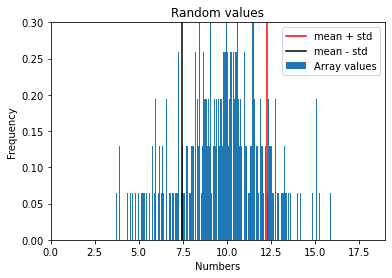

In [93]:
l1 = m + 2.4171
l2 = m - 2.4171

plt.title('Random values')
plt.hist(c, bins = 500, density = True, label = 'Array values')
plt.plot([l1,l1,l1],[0.00,0.15,0.30], color = 'red', label = 'mean + std')
plt.plot([l2,l2,l2],[0.00,0.15,0.30], color = 'black', label = 'mean - std')
plt.xlim(0.0, 19)
plt.ylim(0.0, 0.30)
plt.legend()
plt.xlabel('Numbers')
plt.ylabel('Frequency')

plt.show()

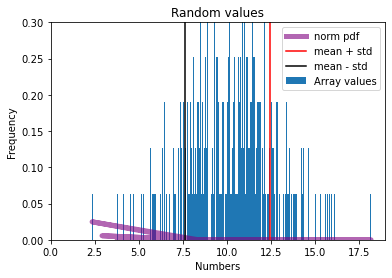

In [136]:
l1 = m + 2.4171
l2 = m - 2.4171

fig, ax = plt.subplots(1, 1)
#mean, var, skew, kurt = norm.stats(moments='mvsk')

ax.plot(c, norm.pdf(c),

       'purple', lw=5, alpha=0.6, label='norm pdf')

plt.title('Random values')
plt.hist(c, bins = 500, density = True, label = 'Array values')
plt.plot([l1,l1,l1],[0.00,0.15,0.30], color = 'red', label = 'mean + std')

plt.plot([l2,l2,l2],[0.00,0.15,0.30], color = 'black', label = 'mean - std')
plt.xlim(0.0, 19)
plt.ylim(0.0, 0.30)
plt.legend()
plt.xlabel('Numbers')
plt.ylabel('Frequency')

bins = 500
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi)) * np.exp( - (bins-mu)**2 / (2 * sigma**2)),
         color = 'orange')

plt.show()

In [98]:
o1 = np.where(c >10)
mn = len(o1[0])
o2 = np.where (c<15)
mx = len(o2[0])
o3 = mx-mn
o3 #225 values

225/500 #0.45

cdf = 0.487

0.45

# **Answers:**

a)Actual mean value is 10.118784009334034, which slightly differs from the theoretical as it is hard to arrange all the random values so that the mean will be an exact number.

b)Not really well

c)0.45. They are almost the same, yet theoretical is slightly higher.


## Problem 2

The aim of this problem is to learn to use [exponential distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library. We use the values given in YouTube video [Example distribution - Example 1](https://www.youtube.com/watch?v=4PEX-SuftjQ).

Coding:
- Create an array `x2` of 2 000 [exponentially distributed](https://en.wikipedia.org/wiki/Exponential_distribution) random numbers having the parameter value $\lambda$ given in the Youtube video. This array simulates the real data.
   - Note: Read carefully the notes of `scipy.stats.expon` function and find out how to convert $\lambda$ to *scale*.
- Calculate the descriptive statistics for the simulated data.
- Draw a histogram of the values. (Remember to tune the bin settings properly).
- Draw also a [boxplot](https://en.wikipedia.org/wiki/Box_plot) of the values.
- Using the *percent point function* (see scipy.stats.expon) find the probability $P(2 < x < 4)$. 
- Count the proportion of the values in the simulated data are between 2 and 4.

Questions:
- What are the values for the *time scale* and $\lambda$ explained in the video?
- What does the `x2` present?
- What is the median value for this dataset (read from the statistics)? How much does it differ from the theoretical value (given in video)?
- What is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) for this data?
- How much do the theoretical probability $P(2 < x < 4)$ and the counted proportion values differ? Explain why.


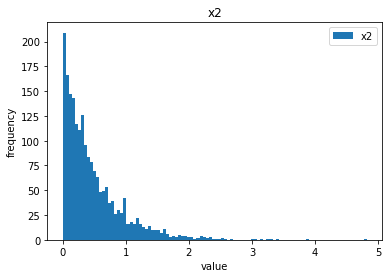

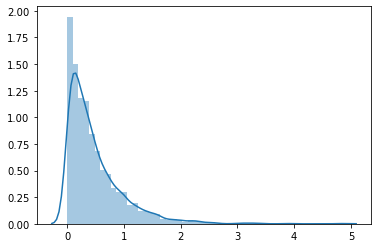

In [43]:
# Your code

x2 = rng.exponential( 0.5, 2000)

x2.mean()#0.49110596751808305
x2.min()#0.0011697813660745179
x2.max()#4.008913400230256
x2.std()#0.47597140852182335

plt.hist(x2, bins = 100, label = 'x2')
xlabel('value')
ylabel('frequency')
title('x2')
legend()
plt.show()
sns.distplot(x2, kde=True)

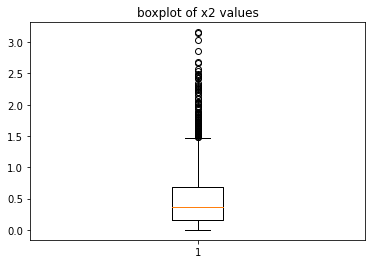

In [30]:
plt.boxplot(x2)
plt.title('boxplot of x2 values')
plt.show()

In [88]:
#r = np.linspace(start = 2, stop=4)

#a1 = norm.ppf(r, loc=0.49110596751808305, scale=0.47597140852182335)
#a1

ppf = 0.000762

v1 = np.where(x2 > 2)
v1 # 36 numbers
v2 = np.where(x2>4)
v2 # 1 number (array([797])
v1 = np.where(x2 == 2)# 0 values
v1 = np.where(x2 == 4)# 0 values

# 36 - 1 = 35 => amount of numbers in the interval


#Proportion = 35/2000 = 0.0175

np.median(x2)#0.33126515785993793
q1=np.quantile(x2, 0.25)#0.13835905821546515
q2=np.quantile(x2, 0.75)#0.6666456558041562

iqr =q2 - q1
iqr #0.5282865975886911
0.0175-0.000762

0.016738000000000003

**Answers:**

a)Time scale is in minutes and 𝜆 = 1/2 person per minute

b)Random values with the scale of 1/2

c)0.33126515785993793. It differs significantly (on 1.5)

d)0.5282865975886911

e)in reality there were way more values in that range(difference is 0.016738000000000003). I belive that partially that happend by chance, on the other hand I got a lot of outliers which the formula could not predict.

## Problem 3

In this problem we study how the accelerometer sensor measurements are distributed. Attached is an example data recorded with [Physics Toolbox Accelerometer](https://play.google.com/store/apps/details?id=com.chrystianvieyra.android.physicstoolboxaccelerometer) application that is freely available in Google Play. Make your own recording using this application:
- Install the application to your mobile phone.
- Open the application.
- Place your mobile phone on the flat surface (for example on the table).
- Click the (+) button to start recording.
- Record at least 30 seconds of data.
- Save the file and send it by email to yourself.

Coding:
- Open the file using Pandas read_csv function.
   - You might need to define `sep` and `decimal` parameters for read_csv. See the documentation for details.
- Create separate graphical plots of the accelerometer data (gFx, gFy, ...). Place the time on x-axis.
- Calculate the descriptive statistics for the accelerometer data.
- Create histograms and annotate the graphics with vertical lines at $\mu \pm \sigma$.
- Select randomly one row from the data and print out the values.

Questions:
- What are the mean values for gFx, gFy, and gFz? How can you predict the orientation of your mobile phone from these values?
- Compare the standard deviations for gFx, gFy, and gFz. How much do they differ? Explain the similarities or diffences.
- How does the histograms of the acceleration data look like? What probability distribution could fit to this data?
- Study the randomly selected row from the data and compare it to the statistics. If you would get only one sample (like this), how confident you would be about the readings? Explain why.



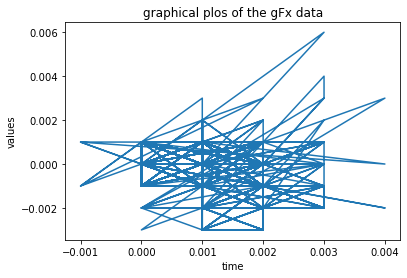

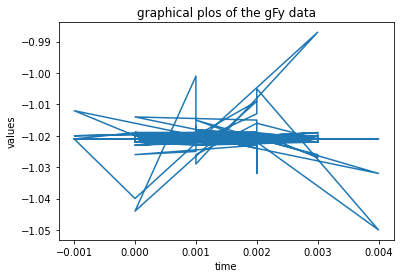

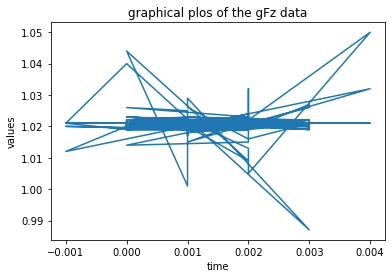

In [12]:
# Your code
file = 'g-force.csv'
sep = ','
data = pd.read_csv(file,sep)

data.head()

plt.plot(data['time'], data['gFx'])
xlabel('time')
ylabel('values')
title('graphical plos of the gFx data')
plt.show()
plt.plot(data['time'], data['gFy'])
xlabel('time')
ylabel('values')
title('graphical plos of the gFy data')
plt.show()
plt.plot(data['time'], data['gFz'])
xlabel('time')
ylabel('values')
title('graphical plos of the gFz data')
plt.show()

In [38]:
data.describe()

a1 = -0.000018 + 0.000818

a2 = -0.000018 - 0.000818

b1 = -1.020611 + 0.001277

b2 = -1.020611 - 0.001277

c1 = 1.020611 + 0.001277

c2 = 1.020611 - 0.001277

data.describe()

,time,gFx,gFy,gFz
count,4499.000000,4499.000000,4499.000000,4499.000000
mean,0.001193,-0.000018,-1.020611,1.020611
std,0.000601,0.000818,0.001277,0.001277
min,-0.001000,-0.003000,-1.050000,0.987000
25%,0.001000,-0.000000,-1.021000,1.020000
50%,0.001000,-0.000000,-1.021000,1.021000
75%,0.002000,0.000000,-1.020000,1.021000
max,0.004000,0.006000,-0.987000,1.050000


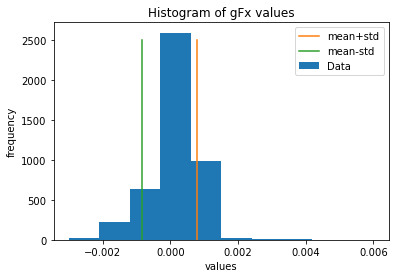

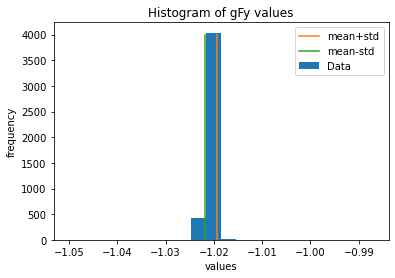

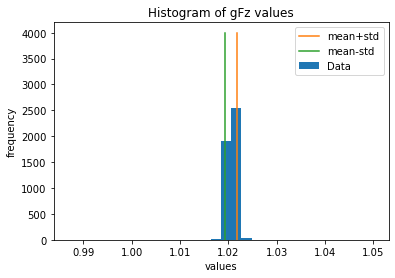

In [40]:
plt.hist(data['gFx'], bins = 10, label = 'Data')
plt.plot([a1,a1,a1],[0,1000,2500], label= 'mean+std')
plt.plot([a2,a2,a2],[0,1000,2500], label= 'mean-std')
xlabel('values')
ylabel('frequency')
title('Histogram of gFx values')
legend()
plt.show()
plt.hist(data['gFy'], bins = 20, label = 'Data')
plt.plot([b1,b1,b1],[0,1000,4000], label= 'mean+std')
plt.plot([b2,b2,b2],[0,1000,4000], label= 'mean-std')
xlabel('values')
ylabel('frequency')
title('Histogram of gFy values')
legend()
plt.show()
plt.hist(data['gFz'], bins = 30, label = 'Data')
plt.plot([c1,c1,c1],[0,1000,4000], label = 'mean+std')
plt.plot([c2,c2,c2],[0,1000,4000], label = 'mean-std')
xlabel('values')
ylabel('frequency')
title('Histogram of gFz values')
legend()
plt.show()

In [37]:
data.sample()

,time,gFx,gFy,gFz
2020-12-09 23:44:29.3010,0.001,0.0,-1.021,1.021


**Answers:**

a)mean of gFx = -0.000018,  mean of gFy = -1.020611, mean of gFz = 1.020611. Judging from the data it was not moving as  mean is around 1 and 0, maybe it was slightly inclined judging from gFy and gFz means. 	

b)gFy and gFy are opposits as their values are the same except the minus sign. gFx value differs from the rest significantly.

c)It remind the normal distribution graph with low std value

d)Usually, taking one random sample from data would not show musch due to possibillity of errors and other factors. Yet, in this case, random sample does not really differ from the mean values, so it would give a clear picture on the mean values.Also, I already know that the phone was not moving, which means that there should not be any random errors.




